In [3]:
import pandas as pd
import os
import re

In [5]:
df = pd.read_csv("TVED Dataset.csv")
df

,utterance,sentiment,emotion,check,By,prepro
0,"01. ""Feeling down today, everything seems a bi...",negative,Sadness,True,A,feeling down today everything seems a bit grey
1,"02. ""Just can't shake off this feeling of heav...",negative,Sadness,True,A,just cant shake off this feeling of heaviness
2,"03. ""It's like a weight in my chest that won't...",negative,Sadness,True,A,its like a weight in my chest that wont go away
3,"04. ""Trying to find some light in this darknes...",negative,Sadness,True,A,trying to find some light in this darkness bu...
4,"05. ""Feeling a bit lost and not sure how to li...",negative,Sadness,True,I,feeling a bit lost and not sure how to lift m...
...,...,...,...,...,...,...
65,"06. ""Terrified about what might happen, need t...",negative,Fear,True,M,terrified about what might happen need to sta...
66,"07. ""Fearing the worst, trying to keep a brave...",negative,Fear,True,M,fearing the worst trying to keep a brave face
67,"08. ""Feeling a knot in my stomach, scared to m...",negative,Fear,True,E,feeling a knot in my stomach scared to move f...
68,"09. ""That was really frightening, still shaking.""",negative,Fear,True,E,that was really frightening still shaking


In [6]:
df = pd.read_csv("TVED Dataset.csv")
df.drop(['check'],axis=1,inplace=True)
df['utterance'] = df.utterance.apply(lambda x: re.sub(r'[^a-zA-Z ]','',x).lower())
emotions = df.emotion.unique()
df['video'] = [f"{emotion} {i}" for emotion in emotions for i in range(1, 11)]
df

,utterance,sentiment,emotion,By,prepro,video
0,feeling down today everything seems a bit grey,negative,Sadness,A,feeling down today everything seems a bit grey,Sadness 1
1,just cant shake off this feeling of heaviness,negative,Sadness,A,just cant shake off this feeling of heaviness,Sadness 2
2,its like a weight in my chest that wont go away,negative,Sadness,A,its like a weight in my chest that wont go away,Sadness 3
3,trying to find some light in this darkness bu...,negative,Sadness,A,trying to find some light in this darkness bu...,Sadness 4
4,feeling a bit lost and not sure how to lift m...,negative,Sadness,I,feeling a bit lost and not sure how to lift m...,Sadness 5
...,...,...,...,...,...,...
65,terrified about what might happen need to sta...,negative,Fear,M,terrified about what might happen need to sta...,Fear 6
66,fearing the worst trying to keep a brave face,negative,Fear,M,fearing the worst trying to keep a brave face,Fear 7
67,feeling a knot in my stomach scared to move f...,negative,Fear,E,feeling a knot in my stomach scared to move f...,Fear 8
68,that was really frightening still shaking,negative,Fear,E,that was really frightening still shaking,Fear 9


In [7]:
df['gender'] = df.By.apply(lambda x: 'Male' if x=='I' or x=='M' else 'Female')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

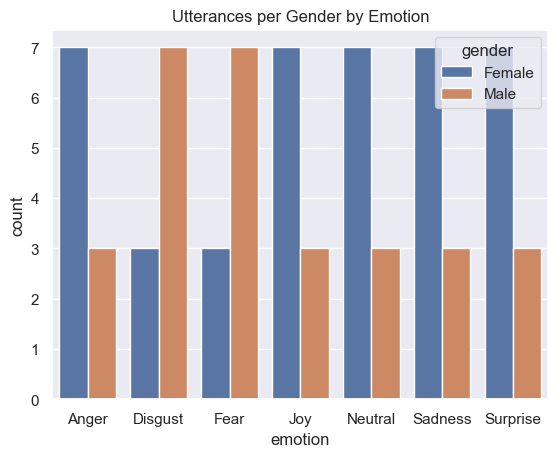

In [9]:
grouped_df = pd.DataFrame(df.groupby('emotion')['gender'].value_counts())

# Reset the index to convert it to a regular DataFrame
grouped_df = grouped_df.rename(columns={'gender': 'count'}).reset_index()

# Plotting
sns.barplot(x='emotion', y='count', hue='gender', data=grouped_df)

plt.title('Utterances per Gender by Emotion')
plt.show()

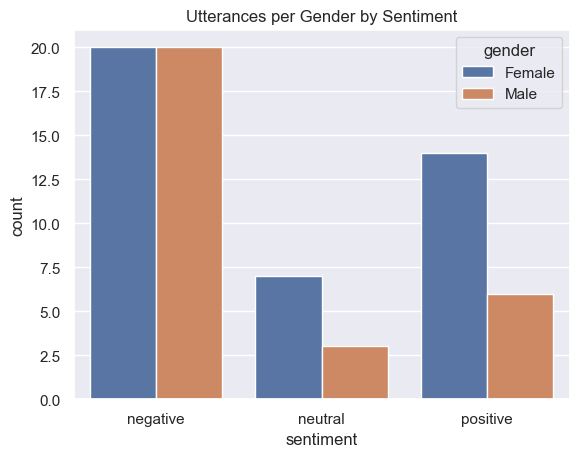

In [24]:
grouped_df = pd.DataFrame(df.groupby('sentiment')['gender'].value_counts())

grouped_df = grouped_df.rename(columns={'gender': 'count'}).reset_index()

sns.barplot(x='sentiment', y='count', hue='gender', data=grouped_df)

plt.title('Utterances per Gender by Sentiment')
plt.show()

In [12]:
import os
from moviepy.editor import VideoFileClip

def get_video_lengths(directory):
    lengths = {}
    for filename in os.listdir(directory):
        if filename.endswith(('.mp4')):
            filepath = os.path.join(directory, filename)
            try:
                with VideoFileClip(filepath) as video:
                    lengths[filename] = video.duration
            except Exception as e:
                print(f"Error processing file {filename}: {e}")
    return lengths

video_lengths = get_video_lengths('Emotions dataset/Good')

for video, length in video_lengths.items():
    print(f"{video}: {length} seconds")


Anger 01.mp4: 8.79 seconds
Anger 02.mp4: 6.64 seconds
Anger 03.mp4: 6.94 seconds
Anger 04.mp4: 9.52 seconds
Anger 05.mp4: 7.01 seconds
Anger 06.mp4: 5.52 seconds
Anger 07.mp4: 6.29 seconds
Anger 08.mp4: 7.31 seconds
Anger 09.mp4: 9.26 seconds
Anger 10.mp4: 8.71 seconds
Disgust 01.mp4: 4.13 seconds
Disgust 02.mp4: 4.9 seconds
Disgust 03.mp4: 3.73 seconds
Disgust 04.mp4: 5.43 seconds
Disgust 05.mp4: 4.5 seconds
Disgust 06.mp4: 3.5 seconds
Disgust 07.mp4: 4.37 seconds
Disgust 08.mp4: 6.76 seconds
Disgust 09.mp4: 6.64 seconds
Disgust 10.mp4: 6.51 seconds
Fear 01.mp4: 5.77 seconds
Fear 02.mp4: 4.07 seconds
Fear 03.mp4: 4.67 seconds
Fear 04.mp4: 4.5 seconds
Fear 05.mp4: 3.07 seconds
Fear 06.mp4: 3.83 seconds
Fear 07.mp4: 5.53 seconds
Fear 08.mp4: 8.76 seconds
Fear 09.mp4: 7.68 seconds
Fear 10.mp4: 7.64 seconds
Joy 01.mp4: 10.72 seconds
Joy 02.mp4: 9.52 seconds
Joy 03.mp4: 8.36 seconds
Joy 04.mp4: 9.31 seconds
Joy 05.mp4: 5.51 seconds
Joy 06.mp4: 4.98 seconds
Joy 07.mp4: 6.08 seconds
Joy 08.m

In [13]:
df['length'] = video_lengths.values()

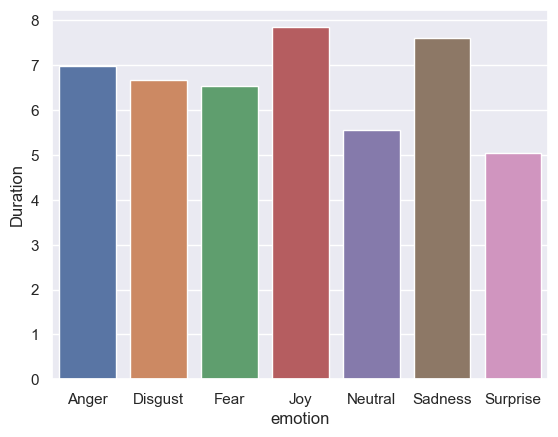

In [14]:
df_len = pd.DataFrame(df.groupby('emotion')['length'].mean())
df_len.columns = ['Duration']
sns.barplot(df_len, x=df_len.index, y='Duration' )
plt.show()

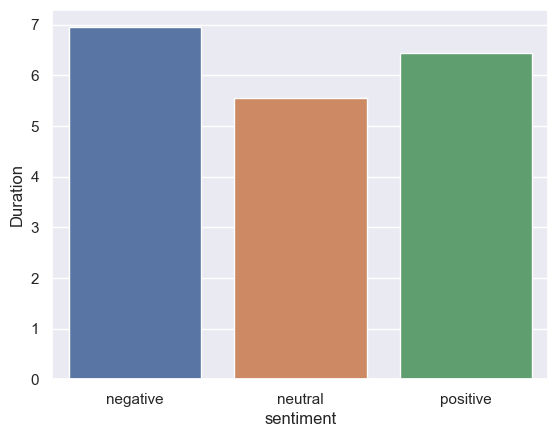

In [15]:
df_len = pd.DataFrame(df.groupby('sentiment')['length'].mean())
df_len.columns = ['Duration']
sns.barplot(df_len, x=df_len.index, y='Duration' )
plt.show()

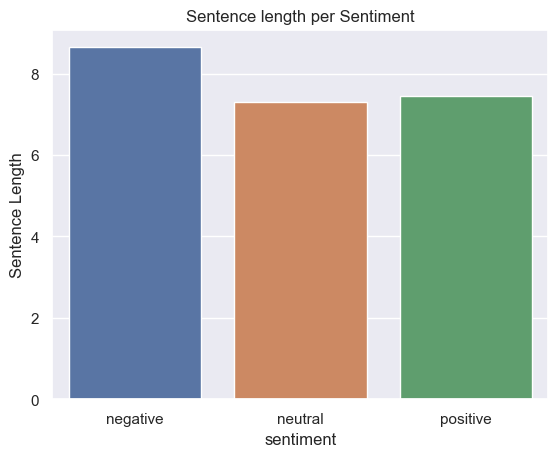

In [17]:
df['Sentence_Length'] = df.utterance.apply(lambda x: len(x.split()))

emo_len = pd.DataFrame(df.groupby('sentiment')['Sentence_Length'].mean())

sns.barplot(emo_len,x=emo_len.index,y='Sentence_Length')
plt.ylabel('Sentence Length')
plt.title('Sentence length per Sentiment')
plt.show()

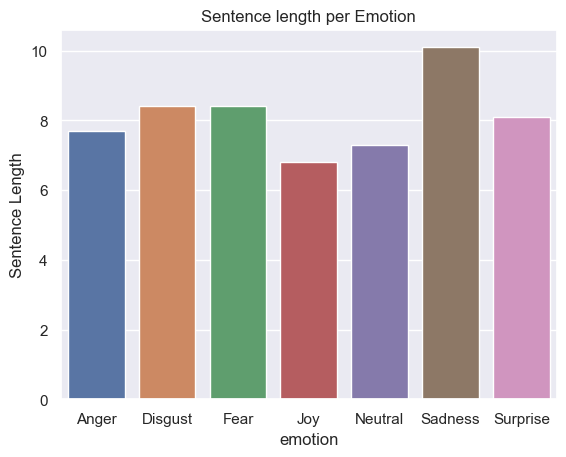

In [23]:
df['Sentence_Length'] = df.utterance.apply(lambda x: len(x.split()))

emo_len = pd.DataFrame(df.groupby('emotion')['Sentence_Length'].mean())

sns.barplot(emo_len,x=emo_len.index,y='Sentence_Length')
plt.ylabel('Sentence Length')
plt.title('Sentence length per Emotion')
plt.show()

In [21]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess(text):
    text = text.lower()
    t = re.sub('\W+',r' ',text)
    t = re.sub('\d',r'',t)
    t = re.sub('oh|uh','',t)
    stopwords_list = stopwords.words('english') 
    txt = ' '.join([word for word in t.split() if word not in stopwords_list])
    return txt

lemmatizer = WordNetLemmatizer()


df['pre_utt'] = [' '.join([lemmatizer.lemmatize(preprocess(text))])
                 .strip() for text in df['utterance']]

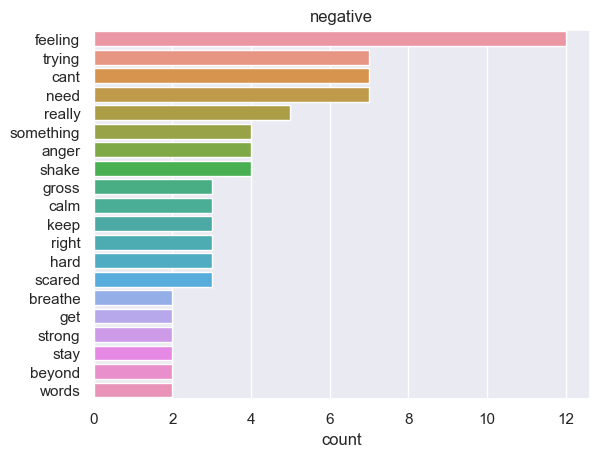

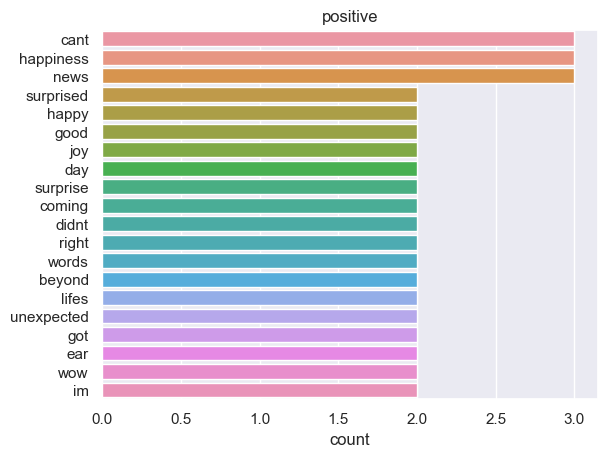

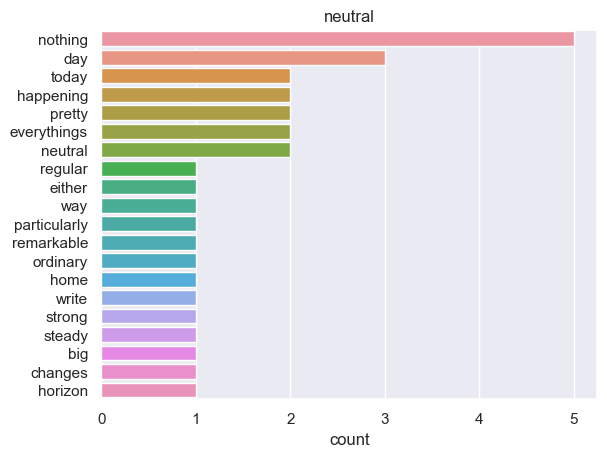

In [22]:
for sentiment in df.sentiment.unique():
    top20 = pd.DataFrame(pd.Series(' '.join(df[df.sentiment == sentiment].pre_utt).split()).value_counts()[:20])
    plt.title(sentiment)
    sns.barplot(top20,x='count',y=top20.index)
    plt.show()



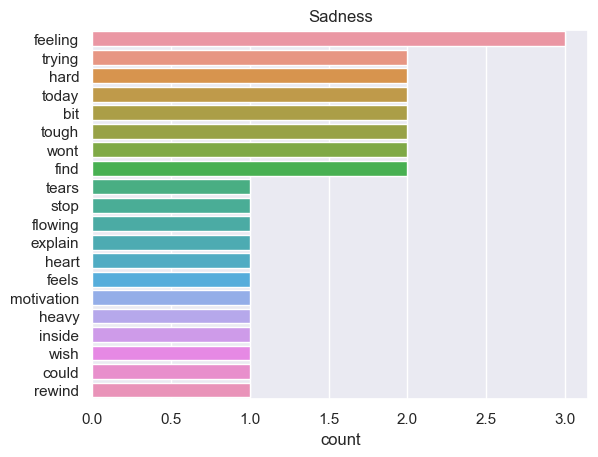

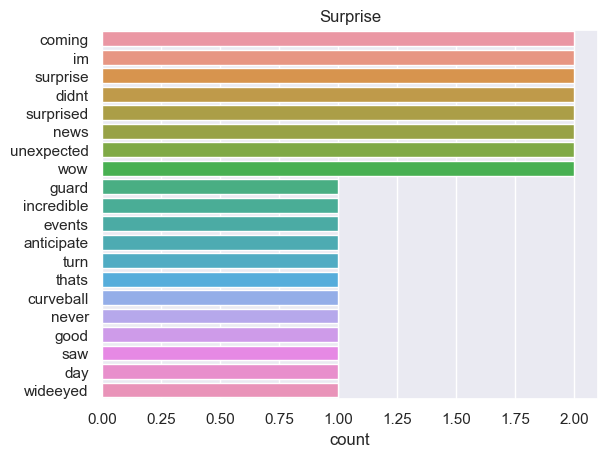

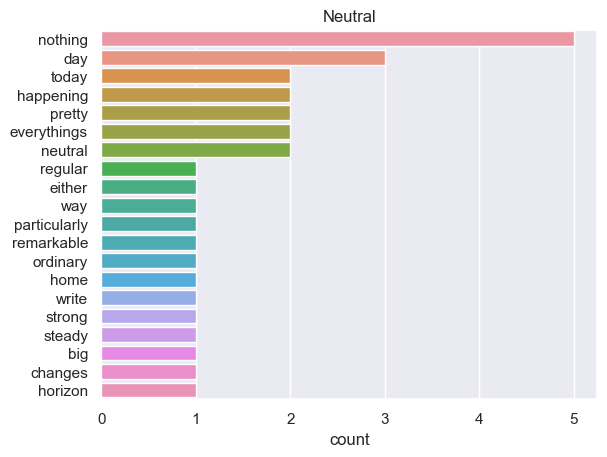

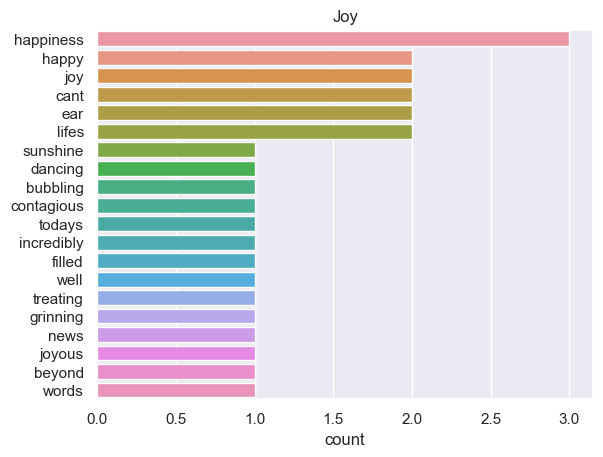

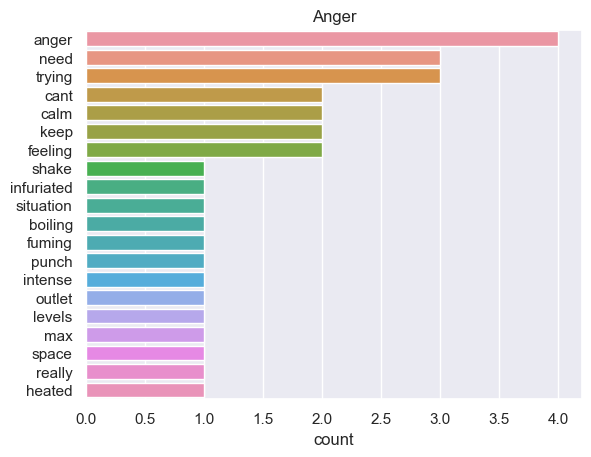

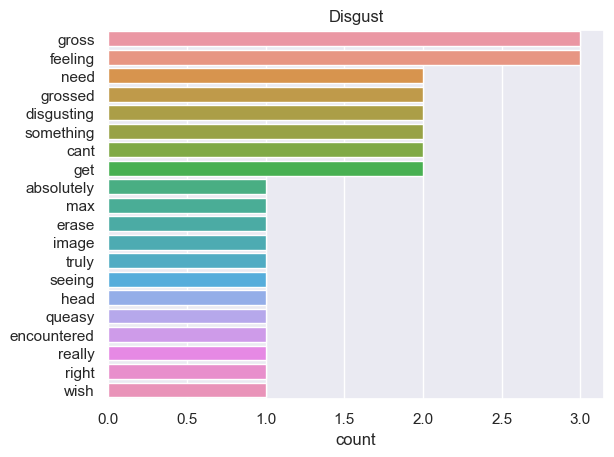

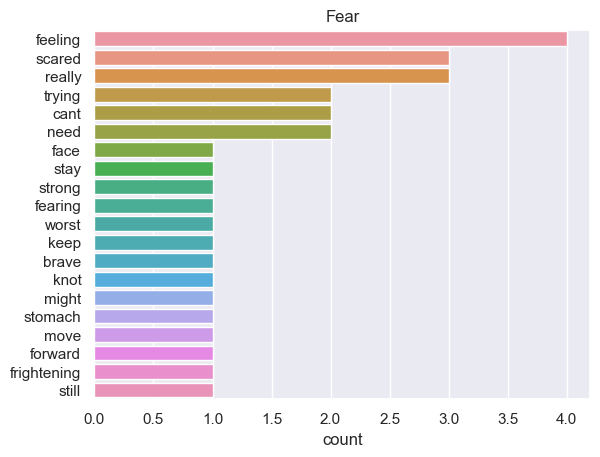

In [25]:
for sentiment in df.emotion.unique():
    top20 = pd.DataFrame(pd.Series(' '.join(df[df.emotion == sentiment].pre_utt).split()).value_counts()[:20])
    plt.title(sentiment)
    sns.barplot(top20,x='count',y=top20.index)
    plt.show()

